In [45]:
import glob
import pandas as pd

listOfFileNames = []
listOfClassNames = []
listOfDataPerClass = []
files = []
classNames = []

files = glob.glob("/Users/user/Desktop/FSL by non-signers/ano/1/*.csv")
print(len(files))
listOfFileNames = []
for f in files:
    listOfFileNames.append(f.split("\\")[1])
    
emgDataFrames = {}
emgDataFrames['right'] = []
emgDataFrames['left'] = []
    
accDataFrames = {}
accDataFrames['right'] = []
accDataFrames['left'] = []

gyroDataFrames = {}
gyroDataFrames['right'] = []
gyroDataFrames['left'] = []

dataFrameDictionary = {}
leftctr = 0
rightctr = 0
for fileName in listOfFileNames:
    fileLocation = "/Users/user/Desktop/FSL by non-signers/ano/1/"+fileName 
    #print(fileLocation)
    df = pd.read_csv(fileLocation)
    
    if "emg" in fileName:   
        if "-0-" in fileName:
            emgDataFrames['right'].append(df)
            leftctr+=1
        else:
            emgDataFrames['left'].append(df)
            rightctr+=1
    elif ("accelerometer") in fileName:
        if "-0-" in fileName:
            accDataFrames['right'].append(df)
            leftctr+=1
        else:
            accDataFrames['left'].append(df)
            rightctr+=1
    elif ("gyro") in fileName:
        if "-0-" in fileName:
            gyroDataFrames['right'].append(df)
            leftctr+=1
        else:
            gyroDataFrames['left'].append(df)      
            rightctr+=1

print("Total of " + str(leftctr) + " left arm files and " + str(rightctr) + " right arm files.")

    
#listOfClassNames
#listOfDataPerClass[0]
print("Done listing the class and file names")

50
Total of 15 left arm files and 15 right arm files.
Done listing the class and file names


In [47]:
trimmedAccDataFrames = {}
trimmedAccDataFrames['right'] = []
trimmedAccDataFrames['left'] = []

trimmedGyroDataFrames = {}
trimmedGyroDataFrames['right'] = []
trimmedGyroDataFrames['left'] = []

trimmedEmgDataFrames = {}
trimmedEmgDataFrames['right'] = []
trimmedEmgDataFrames['left'] = []

for i in range(0,len(gyroDataFrames['right'])):
    start = -1
    end = -1
    counter = 0
    for x in accDataFrames['right'][i]['x']:  
        if(x < 0.85 and start ==-1):
            #print(x)
            start = counter - 10
        elif(start != -1 and x>0.99):
            end = counter + 9
            break;
        counter += 1
    
    startEmg = -1
    endEmg = -1
    counter2 = 0
    for t in emgDataFrames['right'][i]['timestamp']:
        if(t > accDataFrames['right'][i].loc[start]['timestamp'] and startEmg == -1):
            #print("%s > %f" % (t, accDataFrames['right'][i].loc[start]['timestamp']))
            startEmg = counter2-1
        elif(startEmg != -1 and t > accDataFrames['right'][i].loc[end]['timestamp']):
            #print("%s > %f" % (t, accDataFrames['right'][i].loc[end]['timestamp']))
            endEmg = counter2-1
            break;
        counter2 += 1
    
    newAccDf = accDataFrames['right'][i].loc[start:end]
    newAccDf = newAccDf.reset_index(drop=True)
    newGyroDf = gyroDataFrames['right'][i].loc[start:end]
    newGyroDf = newGyroDf.reset_index(drop=True)
    newEmgDf = emgDataFrames['right'][i].loc[startEmg:endEmg]
    newEmgDf = newEmgDf.reset_index(drop=True)

    trimmedAccDataFrames['right'].append(newAccDf)
    trimmedGyroDataFrames['right'].append(newGyroDf)
    trimmedEmgDataFrames['right'].append(newEmgDf)
    
    print("Start index: %s End index: %s" % (start, end))
    print("Start emg index: %s End emg index: %s" % (startEmg, endEmg))


Start index: 29 End index: 152
Start emg index: 77 End emg index: 567
Start index: 40 End index: 175
Start emg index: 129 End emg index: 667
Start index: 49 End index: 175
Start emg index: 163 End emg index: 665
Start index: 57 End index: 187
Start emg index: 189 End emg index: 707
Start index: 34 End index: 151
Start emg index: 105 End emg index: 571


# Pancheck if goods yung trim

-----1------
Untrimmed


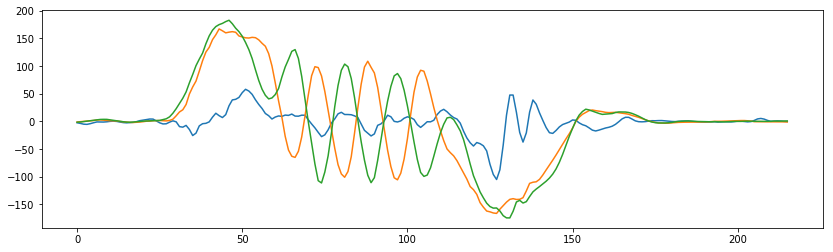

Trimmed


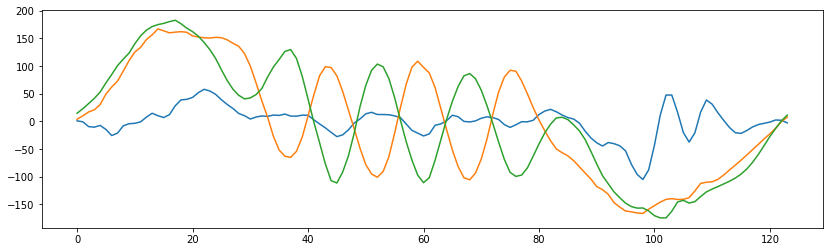

-----2------
Untrimmed


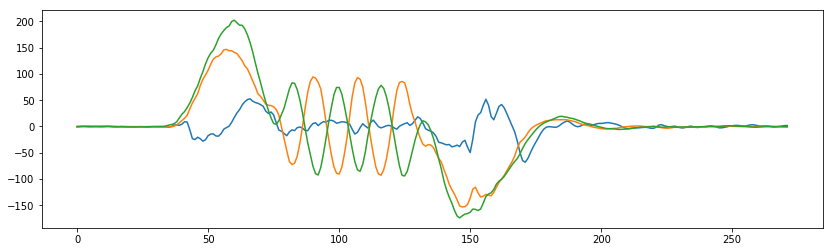

Trimmed


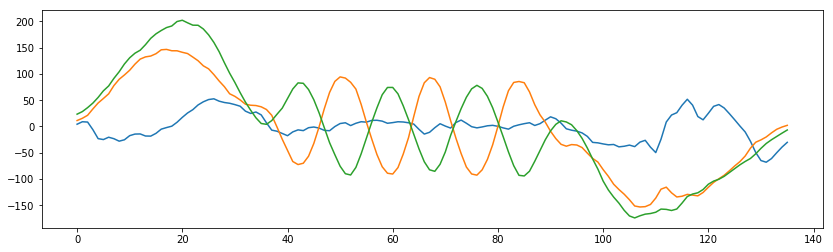

-----3------
Untrimmed


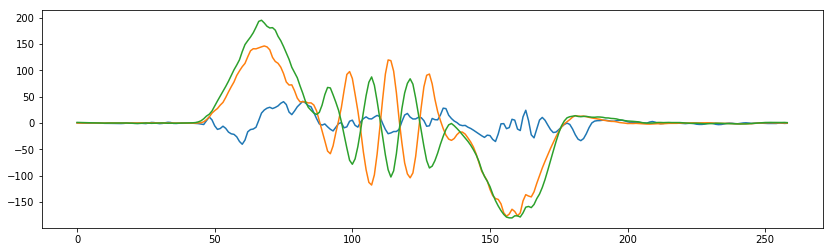

Trimmed


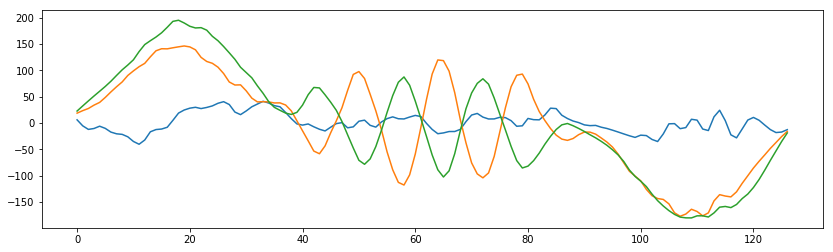

-----4------
Untrimmed


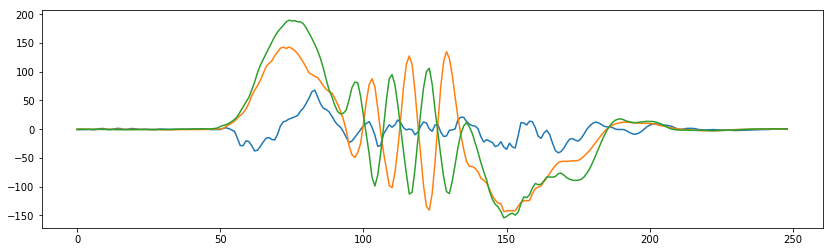

Trimmed


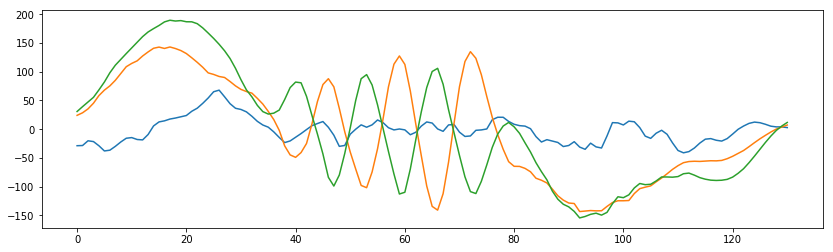

-----5------
Untrimmed


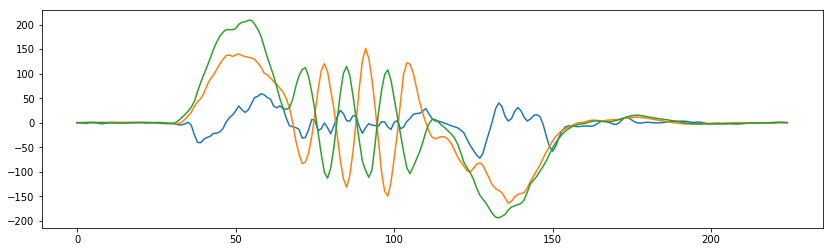

Trimmed


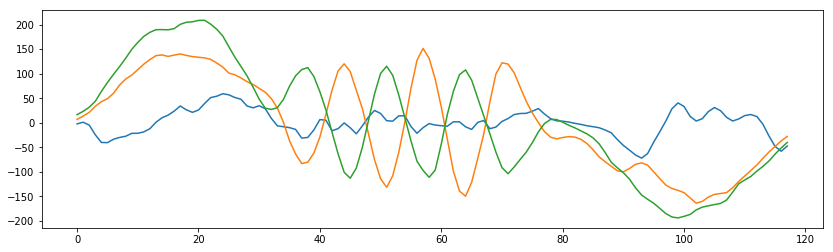

In [49]:
import matplotlib.pyplot as plt

for i in range(0,len(trimmedAccDataFrames['right'])):
    print("-----%s------" % str(i+1))
    print("Untrimmed")

    fig_size = plt.rcParams["figure.figsize"]    
    fig_size[0] = 14
    fig_size[1] = 4
    plt.rcParams["figure.figsize"] = fig_size

#     acc graph
#     plt.plot(accDataFrames['right'][i]['x'])
#     plt.plot(accDataFrames['right'][i]['y'])
#     plt.plot(accDataFrames['right'][i]['z'])
    
#     plt.plot(emgDataFrames['right'][i]['emg1'])
#     plt.plot(emgDataFrames['right'][i]['emg2'])
#     plt.plot(emgDataFrames['right'][i]['emg3'])
#     plt.plot(emgDataFrames['right'][i]['emg4'])
#     plt.plot(emgDataFrames['right'][i]['emg5'])
#     plt.plot(emgDataFrames['right'][i]['emg6'])
#     plt.plot(emgDataFrames['right'][i]['emg7'])
#     plt.plot(emgDataFrames['right'][i]['emg8'])
    
    plt.plot(gyroDataFrames['right'][i]['x'])
    plt.plot(gyroDataFrames['right'][i]['y'])
    plt.plot(gyroDataFrames['right'][i]['z'])
    plt.show()
    print("Trimmed")

    fig_size = plt.rcParams["figure.figsize"]    
    fig_size[0] = 14
    fig_size[1] = 4
    plt.rcParams["figure.figsize"] = fig_size
#     plt.plot(trimmedAccDataFrames['right'][i]['x'])
#     plt.plot(trimmedAccDataFrames['right'][i]['y'])
#     plt.plot(trimmedAccDataFrames['right'][i]['z'])
    
#     plt.plot(trimmedEmgDataFrames['right'][i]['emg1'])
#     plt.plot(trimmedEmgDataFrames['right'][i]['emg2'])
#     plt.plot(trimmedEmgDataFrames['right'][i]['emg3'])
#     plt.plot(trimmedEmgDataFrames['right'][i]['emg4'])
#     plt.plot(trimmedEmgDataFrames['right'][i]['emg5'])
#     plt.plot(trimmedEmgDataFrames['right'][i]['emg6'])
#     plt.plot(trimmedEmgDataFrames['right'][i]['emg7'])
#     plt.plot(trimmedEmgDataFrames['right'][i]['emg8'])

    plt.plot(trimmedGyroDataFrames['right'][i]['x'])
    plt.plot(trimmedGyroDataFrames['right'][i]['y'])
    plt.plot(trimmedGyroDataFrames['right'][i]['z'])
    plt.show()

In [ ]:
# import numpy as np

# start = -1
# end = -1
# counter = 0
# for x in accDataFrames['right'][1]['x']:  
#     mean = np.mean(accDataFrames['right'][0]['x'].loc[0:counter])
#     sd = np.std(accDataFrames['right'][0]['x'].loc[0:counter])*4
#     print("n: %s mean: %s sd: %s mean+sd = %s" % (accDataFrames['right'][0]['x'][counter], mean, sd, mean+sd))
    
#     if(counter>0):
#         if(accDataFrames['right'][1]['y'][counter+1] < (mean-sd)):
#             print(counter+1)
#             break;
#     counter +=1
    


In [ ]:
newdf